# Flatten the data

Iterate through all our samples in `data/raw`:

1. Convert them to a consistent (and lower for compute-cost gain) sampling-rate
2. Convert them to mono (consistency, compute-cost)
3. Assign every unique sample a unique ID
4. Label each sample using `labels.csv` for distribution and metadata lookup
5. Dump samples in canonical state for future use


In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from tools.audio_processing import flatten_samples

root_path = "/Users/jackcdawson/Desktop/dev/sample_identifier/data"

# flatten_samples(root_path) # already run

# Inspect the data


In [ ]:
import pandas as pd

df = pd.read_csv("/Users/jackcdawson/Desktop/dev/sample_identifier/data/labels.csv")

source
splice      2799
maschine    1841
personal     473
Name: count, dtype: int64


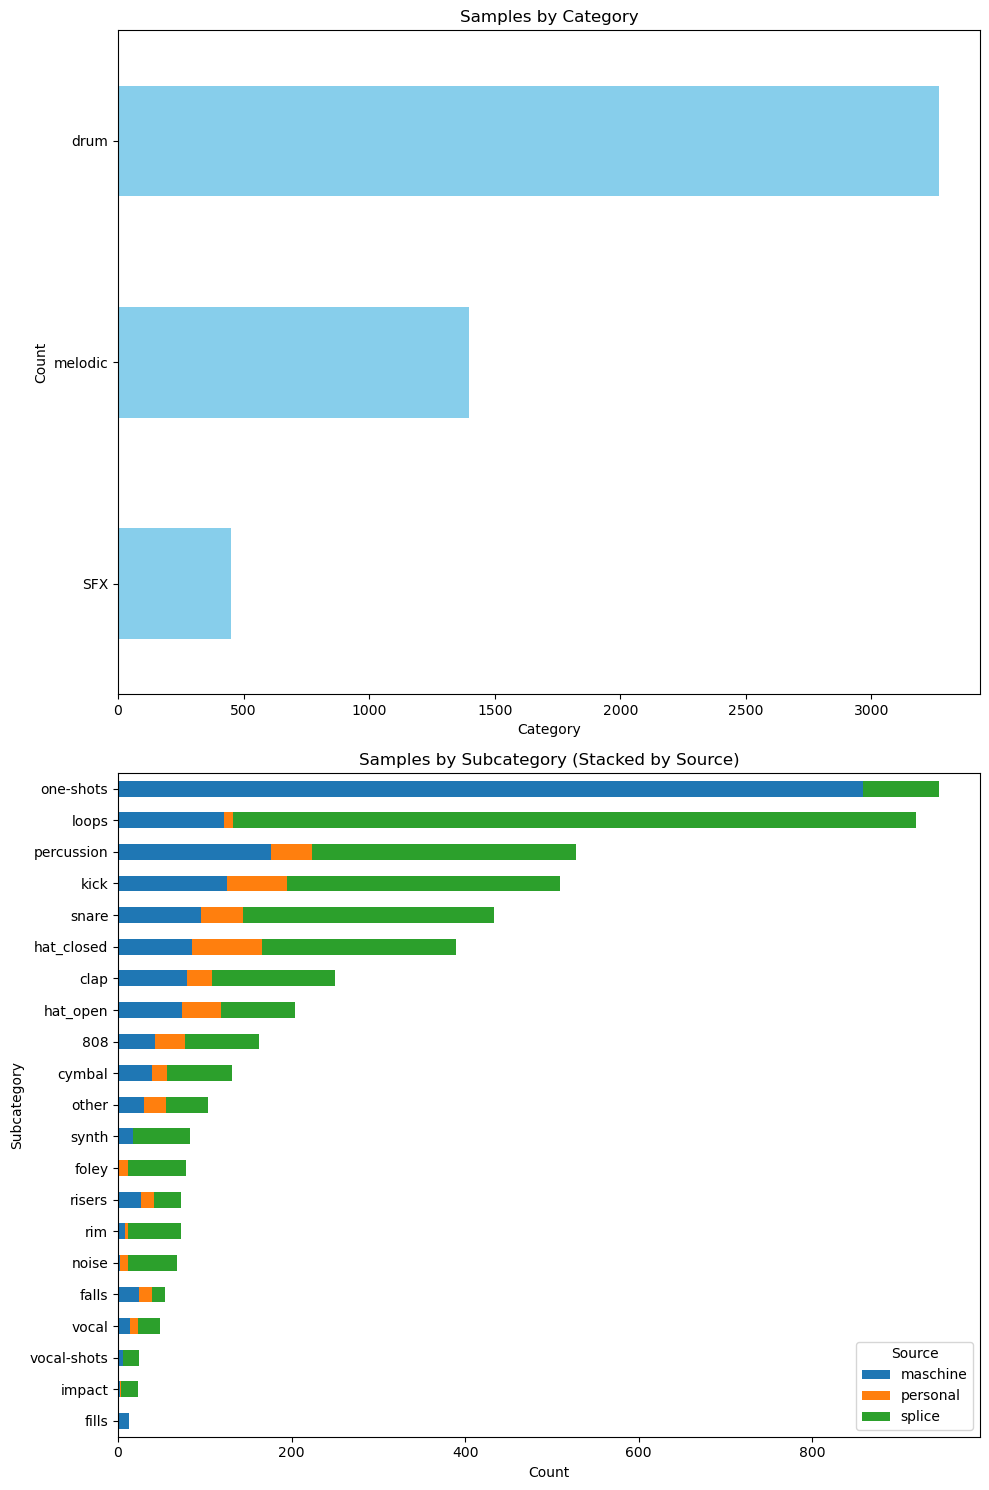

In [ ]:
samples_by_source = df.value_counts("source")
print(samples_by_source)

samples_by_category = df.value_counts("category")

samples_by_subcategory = df.value_counts("sub_category")


import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))


samples_by_category.sort_values(ascending=True).plot(
    kind="barh", ax=ax1, color="skyblue"
)
ax1.set_title("Samples by Category")
ax1.set_xlabel("Category")
ax1.set_ylabel("Count")


category_source_counts = (
    df.groupby(["sub_category", "source"]).size().unstack(fill_value=0)
)
# Sort by the total sum across all sources
category_source_counts["total"] = category_source_counts.sum(axis=1)
category_source_counts = category_source_counts.sort_values("total", ascending=True)
category_source_counts = category_source_counts.drop("total", axis=1)

category_source_counts.plot(kind="barh", stacked=True, ax=ax2)
ax2.set_title("Samples by Subcategory (Stacked by Source)")
ax2.set_xlabel("Count")
ax2.set_ylabel("Subcategory")
ax2.legend(title="Source")

plt.tight_layout()
plt.show()

## Takeaway:

There are a lot of imbalances here. The imbalance between each source isn't a huge concern for me, but the imbalance between categories and subcategories will likely be an issue. Importantly, this is **before** we've done a pass over anomalous data using isolation forests, but I think we'll need to make sure to weight our minority class(es) and/or do some sort of over/under sampling methods.